In [18]:
import pandas as pd

weather_2015 = pd.read_excel('ONTARIO-2015.xlsx')
weather_2016 = pd.read_excel('ONTARIO-2016.xlsx')
product_details = pd.read_excel('Product Details.xlsx')
purchase_frequency = pd.read_excel('Media data and other information.xlsx')
sales_data = pd.read_csv('ConsumerElectronics.csv')


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_16748\2466812847.py:7: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('ConsumerElectronics.csv')


In [19]:
weather_2015.head(30)

,Station Name,AMHERSTBURG,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Province,ONTARIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latitude,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Longitude,-83.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Elevation,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Climate Identifier,6130257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,WMO Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TC Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Legend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,Accumulated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ontario_details = weather_2015.iloc[:20].copy()

In [21]:
weather_2015 = weather_2015.iloc[23:]
weather_2016 = weather_2016.iloc[23:]

In [23]:
weather_2015.reset_index(drop=True, inplace=True)
weather_2016.reset_index(drop=True, inplace=True)

In [25]:
weather_2015.columns = weather_2015.iloc[0]
weather_2015 = weather_2015.drop(0, axis=0)

In [26]:
weather_2016.columns = weather_2016.iloc[0]
weather_2016 = weather_2016.drop(0, axis=0)

In [32]:
weather_2015['Date/Time'] = pd.to_datetime(weather_2015['Date/Time'])
weather_2016['Date/Time'] = pd.to_datetime(weather_2016['Date/Time'])

In [33]:
weather_2015['Date/Time'] = weather_2015['Date/Time'].dt.date
weather_2016['Date/Time'] = weather_2016['Date/Time'].dt.date

In [49]:
weather_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1 to 365
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date/Time                  365 non-null    object
 1   Year                       365 non-null    object
 2   Month                      365 non-null    object
 3   Day                        365 non-null    object
 4   Data Quality               229 non-null    object
 5   Max Temp (°C)              216 non-null    object
 6   Max Temp Flag              13 non-null     object
 7   Min Temp (°C)              190 non-null    object
 8   Min Temp Flag              39 non-null     object
 9   Mean Temp (°C)             190 non-null    object
 10  Mean Temp Flag             39 non-null     object
 11  Heat Deg Days (°C)         190 non-null    object
 12  Heat Deg Days Flag         39 non-null     object
 13  Cool Deg Days (°C)         190 non-null    object
 14  Cool Deg D

In [50]:
weather_2015.describe()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
count,365,365,365,365,229,216,13,190,39,190.0,...,229,9,229,12,229,2,0,0,0,0
unique,365,1,12,31,1,75,1,67,1,101.0,...,7,1,50,1,13,1,0,0,0,0
top,2015-01-01,2015,1,1,†,27,M,14,M,20.8,...,0,T,0,T,0,T,NaN,NaN,NaN,NaN
freq,1,365,31,12,229,11,13,9,39,7.0,...,218,9,148,12,207,2,NaN,NaN,NaN,NaN


In [37]:
weather_2015.shape

(365, 27)

In [48]:
exclude_columns = ['Date/Time','Year','Day','Month']
for column in weather_2015.columns:
    if column not in exclude_columns:
        unique_values = weather_2015[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Data Quality': ['†' nan]
Unique values in column 'Max Temp (°C)': [0 3 2.5 -10 nan -7 -2.5 -12 5 -4 -5 2 1 -1.5 0.5 -5.5 -3 -6.5 -8.5 3.5 6
 7 11 13 9 15 14.5 13.5 8 18 18.5 15.5 21.5 17.5 23 12.5 14 20 22 24 26
 22.5 28 30.5 29 29.5 19 25.5 27 12 16.5 23.5 27.5 32.5 25 28.5 17 24.5 30
 32 33 31 31.5 33.5 26.5 20.5 19.5 16 10.5 1.5 4.5 7.5 6.5 5.5 11.5 9.5]
Unique values in column 'Max Temp Flag': [nan 'M']
Unique values in column 'Min Temp (°C)': [-8.5 -3 -4 0 -13.5 nan -14 -17 -6 -10.5 -0.5 -10 -19 -14.5 -24 -15.5 -20
 -18.5 -12.5 -5.5 2 3 -9 3.5 4 2.5 8.5 1.5 1 5 10 6 7 8 15.5 9 13 14 15 16
 17 11 10.5 17.5 18 19.5 9.5 7.5 13.5 19 21 20 16.5 12 14.5 12.5 21.5 18.5
 20.5 22 11.5 4.5 6.5 -1.5 -2.5 5.5 -5 -2]
Unique values in column 'Min Temp Flag': [nan 'M']
Unique values in column 'Mean Temp (°C)': [-4.3 0 -0.8 1.3 -11.8 nan -10.5 -14.5 0.5 -5 -6 -6.3 -8.8 -2.5 1 -4.8
 -11.5 -10.8 -18 -12.5 -7.5 -4 -1 4.5 3.5 7 -1.5 7.5 9 9.5 6 10.3 11.8 10
 8.3 10.5 14 8.8 4

In [36]:
weather_2015.isnull().sum()

0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 136
Max Temp (°C)                149
Max Temp Flag                352
Min Temp (°C)                175
Min Temp Flag                326
Mean Temp (°C)               175
Mean Temp Flag               326
Heat Deg Days (°C)           175
Heat Deg Days Flag           326
Cool Deg Days (°C)           175
Cool Deg Days Flag           326
Total Rain (mm)              136
Total Rain Flag              358
Total Snow (cm)              136
Total Snow Flag              356
Total Precip (mm)            136
Total Precip Flag            353
Snow on Grnd (cm)            136
Snow on Grnd Flag            363
Dir of Max Gust (10s deg)    365
Dir of Max Gust Flag         365
Spd of Max Gust (km/h)       365
Spd of Max Gust Flag         365
dtype: int64

In [39]:
weather_2016.isnull().sum()

0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 139
Max Temp (°C)                140
Max Temp Flag                365
Min Temp (°C)                147
Min Temp Flag                358
Mean Temp (°C)               147
Mean Temp Flag               358
Heat Deg Days (°C)           147
Heat Deg Days Flag           358
Cool Deg Days (°C)           147
Cool Deg Days Flag           358
Total Rain (mm)              139
Total Rain Flag              363
Total Snow (cm)              139
Total Snow Flag              359
Total Precip (mm)            139
Total Precip Flag            359
Snow on Grnd (cm)            139
Snow on Grnd Flag            360
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)       366
Spd of Max Gust Flag         366
dtype: int64

In [51]:
weather_2015 = weather_2015.fillna(0)
weather_2016 = weather_2016.fillna(0)

In [56]:
weather_2015 = weather_2015.rename(columns={'Date/Time': 'Date'})
weather_2016 = weather_2016.rename(columns={'Date/Time': 'Date'})

In [57]:
weather_2015.head()

,Date,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
1,2015-01-01,2015,1,1,†,0.0,0,-8.5,0,-4.3,...,0,0,0.0,0,0,0,0,0,0,0
2,2015-01-02,2015,1,2,†,3.0,0,-3.0,0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
3,2015-01-03,2015,1,3,†,2.5,0,-4.0,0,-0.8,...,0,0,24.0,0,0,0,0,0,0,0
4,2015-01-04,2015,1,4,†,2.5,0,0.0,0,1.3,...,1,0,1.0,0,0,0,0,0,0,0
5,2015-01-05,2015,1,5,†,-10.0,0,-13.5,0,-11.8,...,3,0,3.0,0,1,0,0,0,0,0


In [58]:
weather_2016.head()

,Date,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
1,2016-01-01,2016,1,1,0,0.0,0,0.0,0,0.0,...,0.0,0,0.0,0,0,0,0,0,0,0
2,2016-01-02,2016,1,2,0,0.0,0,0.0,0,0.0,...,0.0,0,0.0,0,0,0,0,0,0,0
3,2016-01-03,2016,1,3,0,0.0,0,0.0,0,0.0,...,0.0,0,0.0,0,0,0,0,0,0,0
4,2016-01-04,2016,1,4,0,0.0,0,0.0,0,0.0,...,0.0,0,0.0,0,0,0,0,0,0,0
5,2016-01-05,2016,1,5,0,0.0,0,0.0,0,0.0,...,0.0,0,0.0,0,0,0,0,0,0,0


In [30]:
sales_data.shape

(1648824, 20)

In [59]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data['order_date'] = sales_data['order_date'].dt.date

In [61]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [62]:
sales_data.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,1.022087e+00,5.687832e+00,4.108309e+03,5.403451e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,2.535318e-01,2.983336e+00,8.510918e+03,5.346618e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,1.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03


In [66]:
sales_data['order_id'] = sales_data['order_id'].astype(int)
sales_data['order_item_id'] = sales_data['order_item_id'].astype(int)

In [64]:
if sales_data['cust_id'].dtype != 'int64':
    sales_data['cust_id'] = pd.to_numeric(sales_data['cust_id'], errors='coerce')

In [65]:
if sales_data['pincode'].dtype != 'int64':
    sales_data['pincode'] = pd.to_numeric(sales_data['pincode'], errors='coerce')

In [68]:
sales_data.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                            4904
pincode                            4904
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [69]:
sales_data = sales_data.dropna()

In [70]:
sales_data['cust_id'] = sales_data['cust_id'].astype(int)
sales_data['pincode'] = sales_data['pincode'].astype(int)

In [71]:
sales_data.shape

(1643920, 20)

In [72]:
sales_data.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,-2147483648,-2147483648,6400,1,\N,\N,COD,5,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,-2147483648,-2147483648,6900,1,\N,\N,COD,7,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,-2147483648,-2147483648,1990,1,\N,\N,COD,10,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,-2147483648,-2147483648,1690,1,\N,\N,Prepaid,4,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,-2147483648,-2147483648,1618,1,\N,\N,Prepaid,6,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [77]:
product_details.shape

(74, 4)

In [76]:
product_details.head()

,super_category,category,sub_category,vertical
0,CE,Camera,Camera,Camcorders
1,CE,Camera,Camera,DSLR
2,CE,Camera,Camera,Instant Cameras
3,CE,Camera,Camera,Point & Shoot
4,CE,Camera,Camera,SportsAndAction


In [79]:
purchase_frequency = purchase_frequency.iloc[1:]

In [82]:
purchase_frequency = purchase_frequency.drop('Unnamed: 0', axis=1)

In [86]:
purchase_frequency = purchase_frequency.rename(columns={'Unnamed: 1':'Product', 'Unnamed: 2':'Frequency', 'Unnamed: 3':'Percent'})

In [87]:
purchase_frequency.head()

,Product,Frequency,Percent
1,\N,5828,0.353464
2,AmplifierReceiver,4056,0.245994
3,AudioMP3Player,112892,6.846819
4,Binoculars,14599,0.885419
5,BoomBox,2879,0.174609


In [73]:
weather_data = pd.concat([weather_2015, weather_2016], ignore_index=True)

In [96]:
product_details['vertical'].nunique()

74

In [97]:
sales_data['product_analytic_vertical'].nunique()

74

In [98]:
sales_data['Year'].unique()

array([2015, 2016], dtype=int64)

In [100]:
weather_data.columns

Index(['Date', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object', name=0)

In [101]:
merged_data = pd.merge(sales_data, weather_data, left_on='order_date', right_on='Date', how='left')

In [103]:
pd.set_option('display.max_columns', None)

In [108]:
merged_data.shape

(1643920, 47)

In [109]:
merged_data['pay_date'] = merged_data['order_date'].apply(lambda x: 1 if x.day in [1, 15] else 0)
holidays = ['2015-01-01', '2015-02-16','2015-04-03', '2015-04-06','2015-05-25', '2015-06-01','2015-09-07', '2015-10-12','2015-11-11', '2015-12-25','2015-12-26', '2016-01-01','2016-02-15', '2016-03-25','2016-03-28', '2016-05-23','2016-06-01', '2016-09-05','2016-10-10', '2016-11-11','2016-12-25', '2016-12-26']
merged_data['holiday_flag'] = merged_data['order_date'].isin(holidays).astype(int)

In [114]:
merged_data['holiday_flag'].value_counts()

holiday_flag
0    1643920
Name: count, dtype: int64

In [116]:
merged_data['avg_temp'] = (merged_data['Max Temp (°C)'] + merged_data['Max Temp (°C)']) / 2

In [117]:
merged_data['avg_temp']

0           9.0
1           0.0
2          22.0
3           0.0
4           9.0
           ... 
1643915    25.5
1643916    26.5
1643917    22.5
1643918    22.5
1643919    22.5
Name: avg_temp, Length: 1643920, dtype: float64

In [119]:
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
merged_data['week'] = merged_data['order_date'].dt.isocalendar().week

In [120]:
merged_data.head()

,fsn_id,order_date,Year_x,Month_x,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Date,Year_y,Month_y,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,pay_date,holiday_flag,avg_temp,week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,-2147483648,-2147483648,6400,1,\N,\N,COD,5,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17,2015,10,17,†,9.0,0,0.0,M,0.0,M,0.0,M,0.0,M,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,9.0,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,-2147483648,-2147483648,6900,1,\N,\N,COD,7,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19,2015,10,19,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,-2147483648,-2147483648,1990,1,\N,\N,COD,10,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20,2015,10,20,†,22.0,0,12.5,0,17.3,0,0.7,0,0.0,0,0.0,T,0.0,0,0.0,T,0,0,0,0,0,0,0,0,22.0,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,-2147483648,-2147483648,1690,1,\N,\N,Prepaid,4,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14,2015,10,14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,-2147483648,-2147483648,1618,1,\N,\N,Prepaid,6,-2147483648,-2147483648,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17,2015,10,17,†,9.0,0,0.0,M,0.0,M,0.0,M,0.0,M,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,9.0,42


In [128]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643920 entries, 0 to 1643919
Data columns (total 51 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1643920 non-null  object        
 1   order_date                       1643920 non-null  datetime64[ns]
 2   Year_x                           1643920 non-null  int64         
 3   Month_x                          1643920 non-null  int64         
 4   order_id                         1643920 non-null  int32         
 5   order_item_id                    1643920 non-null  int32         
 6   gmv                              1643920 non-null  object        
 7   units                            1643920 non-null  int64         
 8   deliverybdays                    1643920 non-null  object        
 9   deliverycdays                    1643920 non-null  object        
 10  s1_fact.order_payment_type    

In [144]:
merged_data.to_csv('output.csv', index = False)

In [130]:
merged_data['gmv'] = merged_data['gmv'].astype(float)

In [131]:
weekly_data = merged_data.groupby(['week', 'product_analytic_sub_category']).agg({'gmv':'sum', 'units':'sum', 'avg_temp':'mean'}).reset_index()

In [169]:
merged_data.columns

Index(['fsn_id', 'order_date', 'Year_x', 'Month_x', 'order_id',
       'order_item_id', 'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'Date', 'Year_y', 'Month_y',
       'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag',
       'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)',
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag', 'pay_date',
       'holiday_flag', 'avg_temp

In [196]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_data['encoded_category'] = le.fit_transform(merged_data['product_analytic_sub_category'])

In [199]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_data['encoded_order_payment_type'] = le.fit_transform(merged_data['s1_fact.order_payment_type'])

In [200]:
merged_data[['avg_temp', 'pay_date', 'holiday_flag', 'week', 'product_analytic_sub_category', 'encoded_category', 'product_mrp', 'units', 's1_fact.order_payment_type', 'encoded_order_payment_type', 'sla']]

,avg_temp,pay_date,holiday_flag,week,product_analytic_sub_category,encoded_category,product_mrp,units,s1_fact.order_payment_type,encoded_order_payment_type,sla
0,9.0,0,0,42,CameraAccessory,4,7190,1,COD,0,5
1,0.0,0,0,43,CameraAccessory,4,7190,1,COD,0,7
2,22.0,0,0,43,CameraAccessory,4,2099,1,COD,0,10
3,0.0,0,0,42,CameraAccessory,4,2099,1,Prepaid,1,4
4,9.0,0,0,42,CameraAccessory,4,2099,1,Prepaid,1,6
...,...,...,...,...,...,...,...,...,...,...,...
1643915,25.5,0,0,39,TVVideoSmall,13,2499,1,COD,0,7
1643916,26.5,0,0,40,TVVideoSmall,13,2499,1,COD,0,10
1643917,22.5,0,0,40,TVVideoSmall,13,2499,1,COD,0,5
1643918,22.5,0,0,40,TVVideoSmall,13,2499,1,COD,0,3


In [170]:
weekly_data['pay_date'] = merged_data['pay_date']

In [171]:
weekly_data

,week,product_analytic_sub_category,gmv,units,avg_temp,pay_date
0,1,AmplifierReceiver,1.017450e+05,75,2.925676,0
1,1,AudioAccessory,3.760270e+05,262,2.380000,0
2,1,AudioMP3Player,2.765836e+06,2388,2.152146,0
3,1,Camera,2.520446e+07,1571,2.411519,0
4,1,CameraAccessory,5.298924e+06,5549,1.584256,0
...,...,...,...,...,...,...
665,53,GamingConsole,6.301918e+06,538,1.048780,0
666,53,HomeAudio,5.316768e+06,2504,0.807600,1
667,53,HomeTheatre,3.341830e+05,67,0.485075,0
668,53,Speaker,1.175321e+07,10914,0.686111,0


In [138]:
weekly_data.dtypes

week                              UInt32
product_analytic_sub_category     object
gmv                              float64
units                              int64
avg_temp                         float64
dtype: object

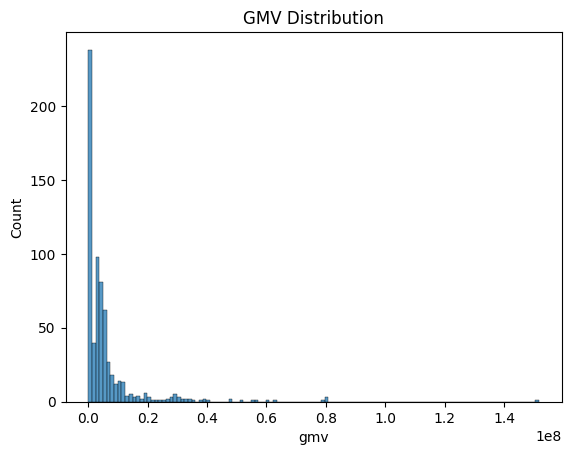

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_data['gmv'])
plt.title('GMV Distribution')
plt.show()

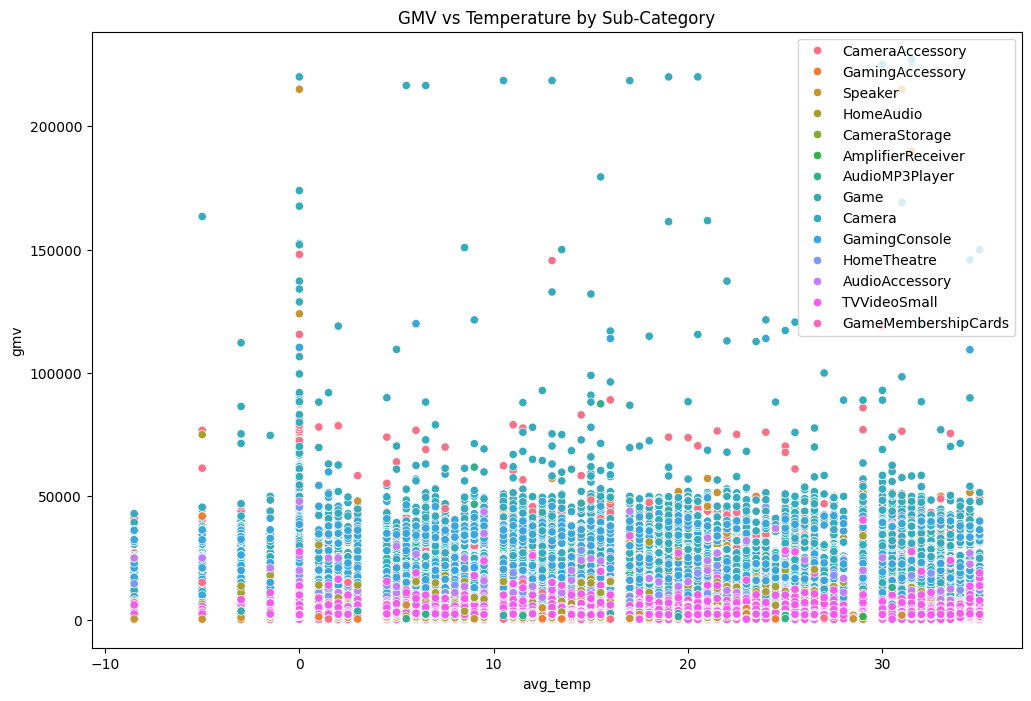

In [145]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='avg_temp', y='gmv', hue='product_analytic_sub_category', ax = ax)
plt.title('GMV vs Temperature by Sub-Category')
plt.legend(loc='upper right')
plt.show()

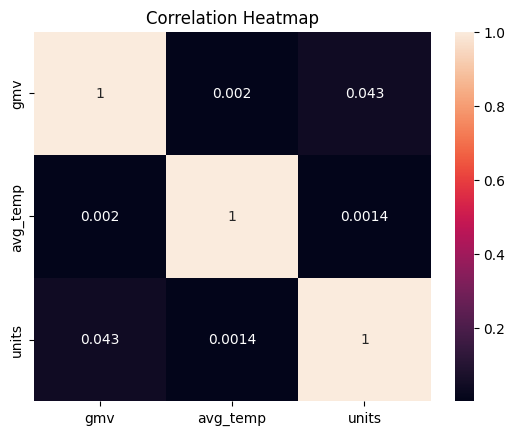

In [146]:
corr = merged_data[['gmv', 'avg_temp', 'units']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [178]:
weekly_data.columns

Index(['week', 'product_analytic_sub_category', 'gmv', 'units', 'avg_temp',
       'pay_date'],
      dtype='object')

In [163]:
merged_data['product_analytic_sub_category'].unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

Model for Camera Accessory

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

camera_data = merged_data[merged_data['product_analytic_sub_category'] == 'CameraAccessory']
X = camera_data[['avg_temp', 'pay_date', 'holiday_flag', 'week', 'encoded_category', 'product_mrp', 'units', 'encoded_order_payment_type', 'sla']]
y = camera_data['gmv']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [241]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

R-squared: 0.8681280225720104


In [242]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions_dtr = dtr.predict(X_test)

In [243]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_dtr)
print('R-squared:', r2)

R-squared: 0.9717610752341611


In [244]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions_rfr = rfr.predict(X_test)

In [245]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_rfr)
print('R-squared:', r2)

R-squared: 0.9800009704324787


In [246]:
import pickle
with open('camera_accessory_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)

Model for Gaming Accessory

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

gaming_data = merged_data[merged_data['product_analytic_sub_category'] == 'GamingAccessory']
X = gaming_data[['avg_temp', 'pay_date', 'holiday_flag', 'week', 'encoded_category', 'product_mrp', 'units', 'encoded_order_payment_type', 'sla']]
y = gaming_data['gmv']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [232]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

R-squared: 0.10408920522065057


In [233]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions_dtr = dtr.predict(X_test)

In [235]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_dtr)
print('R-squared:', r2)

R-squared: 0.9329126606527368


In [236]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions_rfr = rfr.predict(X_test)

In [237]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_rfr)
print('R-squared:', r2)

R-squared: 0.9524055650918382


In [238]:
import pickle
with open('game_accessory_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)

Model for Home theatre

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

home_data = merged_data[merged_data['product_analytic_sub_category'] == 'HomeTheatre']
X = home_data[['avg_temp', 'pay_date', 'holiday_flag', 'week', 'encoded_category', 'product_mrp', 'units', 'encoded_order_payment_type', 'sla']]
y = home_data['gmv']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [224]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

R-squared: 0.7568319186291619


In [225]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions_dtr = dtr.predict(X_test)

In [226]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_dtr)
print('R-squared:', r2)

R-squared: 0.9329776658353185


In [227]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
predictions_rfr = rfr.predict(X_test)

In [228]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_rfr)
print('R-squared:', r2)

R-squared: 0.9243009744869395


In [229]:
import pickle
with open('home_theatre_model.pkl', 'wb') as file:
    pickle.dump(dtr, file)